In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

### 1. Dataset & theta

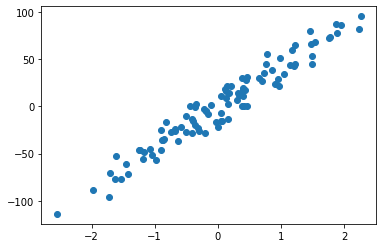

In [2]:
np.random.seed(0) # Pour maitriser l’aléatoire
x, y = make_regression(n_samples=100, n_features=1, noise=10)
plt.scatter(x, y)

In [3]:
# Vérification des dimensions de nos matrices
print(x.shape)
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 1)
(100, 1)


In [4]:
# Colonne de "biais" (colonne de "1")
# matrice X
X = np.hstack((x, np.ones(x.shape))) # permet de coller ensemble deux vecteurs numpy l'un à côté de l'autre
## vecteur de 1 qui a autant de lignes que x, 
print(X.shape)
print(X)

(100, 2)
[[-0.35955316  1.        ]
 [ 0.97663904  1.        ]
 [ 0.40234164  1.        ]
 [-0.81314628  1.        ]
 [-0.88778575  1.        ]
 [ 0.44386323  1.        ]
 [-0.97727788  1.        ]
 [ 0.42833187  1.        ]
 [ 0.20827498  1.        ]
 [-0.31155253  1.        ]
 [-0.51080514  1.        ]
 [ 0.12691209  1.        ]
 [-1.53624369  1.        ]
 [-0.40178094  1.        ]
 [ 0.6536186   1.        ]
 [ 1.17877957  1.        ]
 [-0.17992484  1.        ]
 [ 1.78587049  1.        ]
 [ 1.45427351  1.        ]
 [-0.68481009  1.        ]
 [ 0.97873798  1.        ]
 [ 1.89588918  1.        ]
 [-0.4380743   1.        ]
 [ 0.3130677   1.        ]
 [ 0.76103773  1.        ]
 [ 0.77749036  1.        ]
 [ 1.9507754   1.        ]
 [ 0.33367433  1.        ]
 [-0.34791215  1.        ]
 [ 1.53277921  1.        ]
 [-0.89546656  1.        ]
 [-0.57884966  1.        ]
 [-1.04855297  1.        ]
 [ 0.37816252  1.        ]
 [ 0.01050002  1.        ]
 [ 0.46278226  1.        ]
 [ 0.14404357  1.  

In [5]:
# On doit quand même initialiser theta avec des paramètres aléatoires 
theta = np.random.randn(2, 1) # dimensions du vecteur theta
theta.shape # (2, 1)
theta

array([[-0.63743703],
       [-0.39727181]])

### 2. Modèle

In [6]:
# F = X.theta
def model(X, theta): 
    return X.dot(theta)

In [7]:
model(X, theta)

array([[-0.16807932],
       [-1.0198177 ],
       [-0.65373927],
       [ 0.12105773],
       [ 0.16863569],
       [-0.68020667],
       [ 0.22568129],
       [-0.67030641],
       [-0.530034  ],
       [-0.19867669],
       [-0.07166571],
       [-0.47817028],
       [ 0.58198679],
       [-0.14116177],
       [-0.81391251],
       [-1.14866956],
       [-0.28258106],
       [-1.53565179],
       [-1.32427959],
       [ 0.03925149],
       [-1.02115564],
       [-1.60578177],
       [-0.11802703],
       [-0.59683276],
       [-0.88238544],
       [-0.89287295],
       [-1.64076828],
       [-0.60996819],
       [-0.17549973],
       [-1.37432204],
       [ 0.17353173],
       [-0.02829161],
       [ 0.27111467],
       [-0.63832661],
       [-0.40396492],
       [-0.69226636],
       [-0.48909052],
       [-0.1402719 ],
       [-0.43038373],
       [ 0.40130633],
       [-1.06941839],
       [-0.65234683],
       [ 0.69036798],
       [-1.82570011],
       [-0.51036981],
       [-0

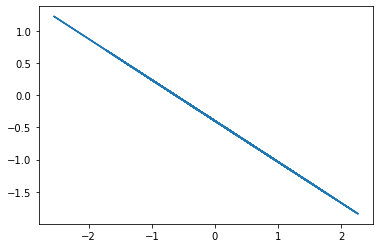

In [8]:
plt.plot(x, model(X, theta))

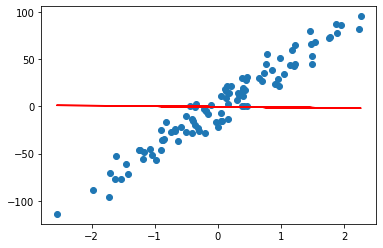

In [9]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')

### 3. Fonction coût (erreur quadratique moyenne)

In [10]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)   # np.power((model(X, theta) - y), 2)

In [11]:
cost_function(X, y, theta)

1009.8259477174702

### 4. Gradient et Descente de Gradient

In [12]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [13]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):

    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        
    return theta

In [14]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations) # tableau de zéros
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta) # on enregistre le coût de notre modèle pour chaue itération
    return theta, cost_history

### 5. Machine Learning (Train)

In [15]:
theta_final = gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000)

In [16]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000)

In [17]:
theta_final

array([[42.61757635],
       [-0.81307283]])

### 7. (Utilisation / Prédictions de notre modèle)

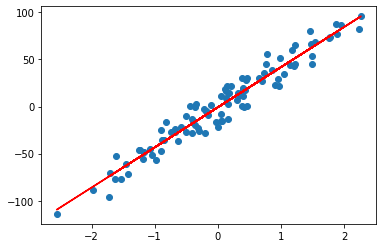

In [18]:
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')

### 6. Courbe d'apprentissage

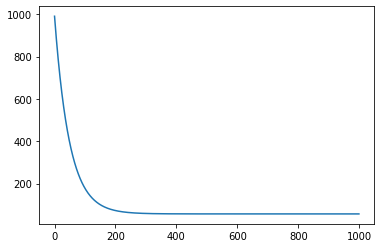

In [19]:
plt.plot(range(1000), cost_history) # range(1000) = 1000 itérations de notre descente de gradient

Evaluation finale

In [20]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [21]:
coef_determination(y, predictions)

0.9417294704806692